# ACLR Data Initial Graphs
### Jessica Ni, Maya Uwaydat, Wissal Khlouf

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('../data/data_clean.csv')
data.head()

,record_id,redcap_event_name,sex_dashboard,age,age_group,acl_rsi,lsi_ext_isok_60,lsi_flex_isok_60,sh_lsi
0,1,visit_1_arm_1,Unknown,21.7,5.0,87.5,87.86,103.32,97.68
1,2,visit_1_arm_1,Unknown,14.5,2.0,8.3,45.00,72.98,75.38
2,3,visit_1_arm_1,Unknown,14.0,2.0,94.2,81.53,81.11,95.20
3,4,visit_1_arm_1,Unknown,17.6,3.0,NaN,61.56,64.21,94.49
4,4,visit_2_arm_1,Unknown,18.2,4.0,76.7,76.20,81.86,96.54


### Graph 1: Flexion LSI over time

When it comes to a **patient** understanding **their** ACLR recovery, being able to visually see changes across time makes understanding their recovery progress easier. Through a line plot, a patient can visually see that progression over multiple visits, allowing them to notice any irregularities that go against the general pattern, which is usually an increase in the recovery statistic. Additionally, having a background population of patients who also underwent ACLR surgery acts as a comparison point, allowing them to compare themselves to a group of people who have gone through a similar recovery process. Having the patient be able to picture themselves in the data is important, as we want for them to understand where they stand in recovery without explicitly knowing miniscule details about medical terminology. Sometimes, seeing yourself as a positive sloping line among a positive sloping population is enough to understand that recovery is going smoothly.

This is a line graph that captures a single patient's recovery progress for Flexion LSI (I randomly chose a patient who had at least 4 visits). Additionally, it has Flexion LSI data over visits from all the patients in the study, which acts as a comparison point for the patient. The population data is shaded to show the IQR, which is the 25th to 75th percentile. My goal is for the patient to be able to picture himself/herself in recovery and understand that test results usually get better over time.

In [20]:
# Prepare data for graph
# Find the 25th and 75th percentile for each visit (1,2,3,4,...)
flsi_percentiles = data.groupby('redcap_event_name')['lsi_flex_isok_60'].agg(mean='mean',q25='quantile', q75='quantile').reset_index()
flsi_percentiles['q25'] = data.groupby('redcap_event_name')['lsi_flex_isok_60'].quantile(0.40).values
flsi_percentiles['q75'] = data.groupby('redcap_event_name')['lsi_flex_isok_60'].quantile(0.60).values

visit_map = {
    'visit_1_arm_1': 1,
    'visit_2_arm_1': 2,
    'visit_3_arm_1': 3,
    'visit_4_arm_1': 4,
    'visit_5_arm_1': 5,
    'visit_6_arm_1': 6,
    'visit_7_arm_1': 7,
    'visit_8_arm_1': 8,
    'visit_9_arm_1': 9}

# Create a new column with just the visit number
flsi_percentiles['visit_num'] = flsi_percentiles['redcap_event_name'].map(visit_map)
flsi_percentiles['visit_num'] = pd.to_numeric(flsi_percentiles['visit_num'], errors='coerce').astype('Int64')
flsi_percentiles = flsi_percentiles[flsi_percentiles['redcap_event_name'] != 'data_upload_arm_2'] # remove unneeded values

# In original dataset, create new column with just the visit number as well
data['visit_num'] = data['redcap_event_name'].map(visit_map)
flsi_percentiles['visit_num'] = pd.to_numeric(flsi_percentiles['visit_num'], errors='coerce').astype('Int64')

flsi_percentiles.head()

,redcap_event_name,mean,q25,q75,visit_num
0,visit_1_arm_1,86.260421,81.826000,91.214712,1
1,visit_2_arm_1,91.778607,87.350000,94.806000,2
2,visit_3_arm_1,92.247613,88.215570,94.757222,3
3,visit_4_arm_1,93.090331,89.861142,98.250000,4
4,visit_5_arm_1,91.345113,88.912821,94.697117,5


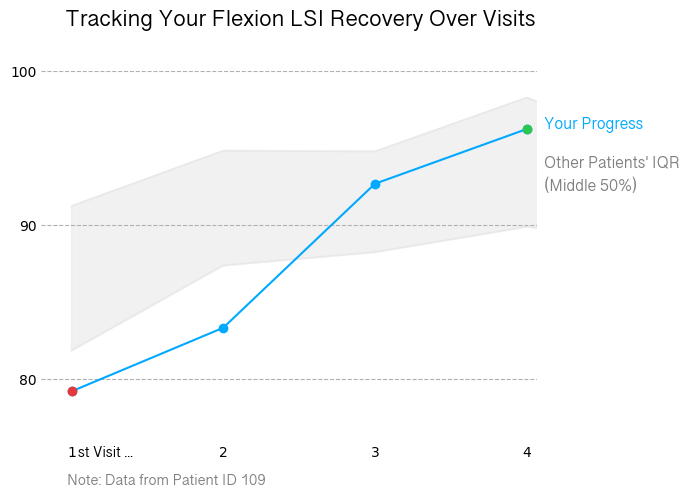

In [21]:
# Plot IQR 25 to 75, and fill the space between
plt.plot(flsi_percentiles['visit_num'], flsi_percentiles['q25'], color="#E5E5E5", alpha=0.5)
plt.plot(flsi_percentiles['visit_num'], flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5)
plt.fill_between(flsi_percentiles['visit_num'], 
                 flsi_percentiles['q25'], 
                 flsi_percentiles['q75'], color="#E5E5E5", alpha=0.5, label = 'patients')

# Choose a patient to showcase their recovery progress
highlight_data = data[data['record_id'] == 109]

# Line plot of recovery
plt.plot(highlight_data['visit_num'], highlight_data['lsi_flex_isok_60'],
         linestyle='-', marker='o', color='#00A9FF', label='You')

# Add colored dots
plt.plot(highlight_data['visit_num'].iloc[0], highlight_data['lsi_flex_isok_60'].iloc[0], marker='o', color='#E5383B', markersize=6)
plt.plot(highlight_data['visit_num'].iloc[3], highlight_data['lsi_flex_isok_60'].iloc[3], marker='o', color='#2DC653', markersize=6)

# Add titles/labels/text
plt.title('Tracking Your Flexion LSI Recovery Over Visits', weight='bold', size=17, x=0.522, y=1.1, fontfamily='Sinhala Sangam MN')
plt.figtext(0.91, 0.76, 'Your Progress', fontfamily='Sinhala Sangam MN', size = 12, color='#00A9FF')
plt.figtext(0.91, 0.68, "Other Patients' IQR", fontfamily='Sinhala Sangam MN', size = 12, color='gray')
plt.figtext(0.91, 0.63, "(Middle 50%)", fontfamily='Sinhala Sangam MN', size = 12, color='gray')
plt.figtext(0.182, 0.0755, "st Visit ...", fontfamily='Sinhala Sangam MN', size = 11, color='black')
plt.figtext(0.165, 0.019, "Note: Data from Patient ID 109", fontfamily='Sinhala Sangam MN', size = 11, color='gray')

# Customize graph
plt.xlim(.8, 4.07)
plt.xticks([1, 2, 3, 4])
plt.ylim(76, 100)
plt.yticks([80, 90, 100])

plt.tick_params(axis='y', which='both',length=0)
plt.tick_params(axis='x', which='both',length=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.grid(axis='y', linestyle = '--')

# Fonts: STIX Two Text, Sinhala Sangam MN, Iowan Old Style